# Model Development and Comparison

In [77]:
import pandas as pd
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

model = LinearRegression()
model.fit(X,y)

with open('reg_model.pkl','wb') as file:
    pickle.dump(model,file)
#df1['prediction'] = model.predict(X)
#print(f"MSE: {mean_squared_error(df1['Price of the used car'],df1['prediction'])}")
#print(f"R2Score: {r2_score(df1['Price of the used car'],df1['prediction'])}")




In [117]:
#Linear Regression - Simple
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1
#function used to find the upper and lower values to nullify the outliers
def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')

X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

model = LinearRegression()
model.fit(X,y)
df1['prediction'] = model.predict(X)

print(f"MSE: {mean_squared_error(df1['Price of the used car'],df1['prediction'])}")
print(f"R2Score: {r2_score(df1['Price of the used car'],df1['prediction'])}")

MSE: 21666079726.971905
R2Score: 0.9105408523236128


In [119]:
#Linear Regression - with train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1
#function used to find the upper and lower values to nullify the outliers
def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')

X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']
x_train,x_test,y_train,y_test  = train_test_split(X,y,test_size=0.2)

model = LinearRegression()
model.fit(X,y)
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print('-------TRAIN------')
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_Score: {r2_score(y_train,train_predict)}")

print('----------TEST---------')
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2score: {r2_score(y_test,test_predict)}")

-------TRAIN------
MSE: 21583188386.594593
R2_Score: 0.9104195757415787
----------TEST---------
MSE: 21997595574.463
R2score: 0.911005209594763


In [120]:
#Regularization - Lasso
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1
#function used to find the upper and lower values to nullify the outliers
def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')

X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']
x_train,x_test,y_train,y_test  = train_test_split(X,y,test_size=0.2)

model = Lasso()
model.fit(X,y)
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print('-------TRAIN------')
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_Score: {r2_score(y_train,train_predict)}")

print('----------TEST---------')
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2score: {r2_score(y_test,test_predict)}")

-------TRAIN------
MSE: 21155051421.157524
R2_Score: 0.9138436499248112
----------TEST---------
MSE: 23746091236.307323
R2score: 0.8959275108018543


C:\Users\Revanth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.031e+13, tolerance: 2.027e+11
  model = cd_fast.enet_coordinate_descent(


In [121]:
#Regularization - Ridge
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1
#function used to find the upper and lower values to nullify the outliers
def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')

X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']
x_train,x_test,y_train,y_test  = train_test_split(X,y,test_size=0.2)

model = Ridge()
model.fit(X,y)
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print('-------TRAIN------')
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_Score: {r2_score(y_train,train_predict)}")

print('----------TEST---------')
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2score: {r2_score(y_test,test_predict)}")

-------TRAIN------
MSE: 22614202581.636818
R2_Score: 0.9066156795009639
----------TEST---------
MSE: 19753309175.8674
R2score: 0.9183124860611713


In [122]:
#Regularization - ElasticNet
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1
#function used to find the upper and lower values to nullify the outliers
def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')

X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']
x_train,x_test,y_train,y_test  = train_test_split(X,y,test_size=0.2)

model = ElasticNet()
model.fit(X,y)
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print('-------TRAIN------')
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_Score: {r2_score(y_train,train_predict)}")

print('----------TEST---------')
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2score: {r2_score(y_test,test_predict)}")

-------TRAIN------
MSE: 46586294305.15127
R2_Score: 0.8072821324212742
----------TEST---------
MSE: 42439277601.8181
R2score: 0.8260795403070749


In [89]:
#Decession Tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = DecisionTreeRegressor(max_depth=8,random_state=42)

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 18281273098.791412
R2_score: 0.924967276308127
------TEST----------
MSE: 33829552764.69951
R2_score: 0.856855810008068


In [123]:
#Decession Tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = DecisionTreeRegressor(max_depth=6,random_state=42)

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 28052431641.20082
R2_score: 0.8835628185066103
------TEST----------
MSE: 32925243381.70923
R2_score: 0.8665941898091203


In [125]:
#Decession Tree - decreasing max_depth
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = DecisionTreeRegressor(max_depth=5,random_state=42)

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 33728332567.991844
R2_score: 0.8601316021446674
------TEST----------
MSE: 42773783649.263695
R2_score: 0.8262797186153115


In [126]:
#Decession Tree - increasing the depth
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = DecisionTreeRegressor(max_depth=9,random_state=42)

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 15044875830.351843
R2_score: 0.9389795271619141
------TEST----------
MSE: 29171869575.56337
R2_score: 0.8699128916931347


In [94]:
#Decession Tree min_sample split
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = DecisionTreeRegressor(min_samples_split=15,random_state=42)

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 8315706631.726223
R2_score: 0.965602762825019
------TEST----------
MSE: 27526801589.629177
R2_score: 0.8871514106445347


In [127]:
#Decession Tree min_sample split - 10
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = DecisionTreeRegressor(min_samples_split=10,random_state=42)

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 6257421582.483526
R2_score: 0.9741543906342448
------TEST----------
MSE: 23373679863.3838
R2_score: 0.9035370159179006


In [128]:
#Decession Tree min_sample split - 5
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = DecisionTreeRegressor(min_samples_split=15,random_state=42)

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 8188514371.46753
R2_score: 0.9657867801171556
------TEST----------
MSE: 28911340088.37444
R2_score: 0.8858700143577439


In [129]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor()

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 2495440446.763814
R2_score: 0.9896313464984089
------TEST----------
MSE: 16669817454.818483
R2_score: 0.9326638638940062


In [96]:
#SVR:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = SVR(kernel='linear')

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 59591063797.42013
R2_score: 0.7535759675768644
------TEST----------
MSE: 62247379035.143555
R2_score: 0.7444985856168949


In [97]:
#SVR:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = SVR(kernel='poly')

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 262433580329.64413
R2_score: -0.08276160134675403
------TEST----------
MSE: 257809160482.94122
R2_score: -0.06837308265225617


In [98]:
#SVR:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = SVR(kernel='rbf')

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 263214106945.92773
R2_score: -0.08696457569672522
------TEST----------
MSE: 265027708775.24963
R2_score: -0.09379104996054899


In [106]:
X.size

3297386

In [107]:
y.size

8369

TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

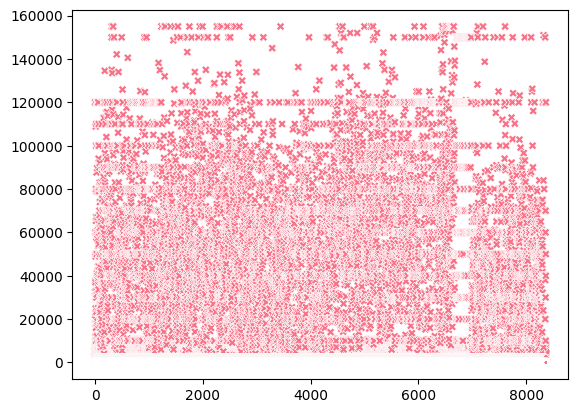

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.scatter(X,y,color='darkorange',label='original data')
sns.scatterplot(X,color='darkorange',label='original data')
#plt.plot(X,predict_data,color='blue',label='predict')
plt.legend()
plt.show()

In [101]:
#SVR:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

model = SVR(kernel='rbf')
model.fit(X,y)
predict_data = model.predict(X)
print(f"MSE: {mean_squared_error(y,predict_data)}")
print(f"R2_score: {r2_score(y,predict_data)}")

# x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# model = SVR(kernel='rbf')

# model.fit(x_train,y_train)

# train_predict = model.predict(x_train)
# test_predict = model.predict(x_test)

# print("------TRAIN----------")
# print(f"MSE: {mean_squared_error(y_train,train_predict)}")
# print(f"R2_score: {r2_score(y_train,train_predict)}")

# print("------TEST----------")
# print(f"MSE: {mean_squared_error(y_test,test_predict)}")
# print(f"R2_score: {r2_score(y_test,test_predict)}")

MSE: 262910462389.00662
R2_score: -0.08555614014684254


In [114]:
#SVR:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

scaler_X = StandardScaler()
scaler_y = StandardScaler()

scaled_X = scaler_X.fit_transform(X)
scaled_y = scaler_y.fit_transform(y.values.reshape(-1,1)).ravel()

model = SVR(kernel='rbf',C=100,epsilon=0.1)
model.fit(scaled_X,scaled_y)
scaled_predict_data = model.predict(scaled_X)
predict_data = scaler_y.inverse_transform(scaled_predict_data.reshape(-1,1)).ravel()
print(f"MSE: {mean_squared_error(y,predict_data)}")
print(f"R2_score: {r2_score(y,predict_data)}")

# x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# model = SVR(kernel='rbf')

# model.fit(x_train,y_train)

# train_predict = model.predict(x_train)
# test_predict = model.predict(x_test)

# print("------TRAIN----------")
# print(f"MSE: {mean_squared_error(y_train,train_predict)}")
# print(f"R2_score: {r2_score(y_train,train_predict)}")

# print("------TEST----------")
# print(f"MSE: {mean_squared_error(y_test,test_predict)}")
# print(f"R2_score: {r2_score(y_test,test_predict)}")

MSE: 4818643975.293086
R2_score: 0.980103840269311


In [116]:
#SVR:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

scaler_x_train = StandardScaler()
scaler_x_test = StandardScaler()
scaler_y_train = StandardScaler()
scaler_y_test = StandardScaler()

scaled_x_train = scaler_x_train.fit_transform(x_train)
scaled_x_test = scaler_x_test.fit_transform(x_test)
scaled_y_train = scaler_y_train.fit_transform(y_train.values.reshape(-1,1)).ravel()
scaled_y_test = scaler_y_test.fit_transform(y_test.values.reshape(-1,1)).ravel()

model = SVR(kernel='rbf',C=100,epsilon=0.1)
model.fit(scaled_x_train,scaled_y_train)

scaled_train_predict = model.predict(scaled_x_train)
train_predict = scaler_y_train.inverse_transform(scaled_train_predict.reshape(-1,1)).ravel()
scaled_test_predict = model.predict(scaled_x_test)
test_predict = scaler_y_test.inverse_transform(scaled_test_predict.reshape(-1,1)).ravel()

#print(f"MSE: {mean_squared_error(y,predict_data)}")
#print(f"R2_score: {r2_score(y,predict_data)}")

print("------TRAIN----------")
print(f"MSE: {mean_squared_error(y_train,train_predict)}")
print(f"R2_score: {r2_score(y_train,train_predict)}")

print("------TEST----------")
print(f"MSE: {mean_squared_error(y_test,test_predict)}")
print(f"R2_score: {r2_score(y_test,test_predict)}")

------TRAIN----------
MSE: 4479756230.363568
R2_score: 0.9815946863226312
------TEST----------
MSE: 29313111590.343838
R2_score: 0.8763563925953947


# Pickling the selected Model:

In [131]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

df1 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
df1 = df1.drop(['Variant name'],axis=1)
df2 = df1

def replace_outliers(data):
    quantile1,quantile3=np.percentile(data,[25,75])
    iqr = quantile3-quantile1
    lowerbound = quantile1 - (1.5*iqr)
    upperbound = quantile3 + (1.5*iqr)
    return(lowerbound,upperbound)

lis=['Kilometers driven','Previous owners','Central variant ID','Price of the used car','Engine Displacement','Registration Year','Mileage',
     'Max Power','Torque','Seats','Gear Box']
for i in lis:
    lowerbound,upperbound = replace_outliers(df1[i])
    data = df1[i]
    for j in data:
        if j<=lowerbound:
            df1[i] = df1[i].replace(to_replace=j,value=lowerbound)
        elif j>=upperbound:
            df1[i] = df1[i].replace(to_replace=j,value=upperbound)

df1['Body type']=df1['Body type'].fillna(df1['Body type'].mode()[0])
df1['Insurance Type']=df1['Insurance Type'].fillna(df1['Insurance Type'].mode()[0])
#one hot representation
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')



X=df1.drop(['Price of the used car'],axis=1)
y=df1['Price of the used car']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor()

model.fit(x_train,y_train)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#Pickling:
with open(r'D:\Aravindh\Guvi\Guvi Project\Project 3\Project 3 Live evaluation\randomforestregressionmodel.pkl','wb') as file:
    pickle.dump(model,file)

# print("------TRAIN----------")
# print(f"MSE: {mean_squared_error(y_train,train_predict)}")
# print(f"R2_score: {r2_score(y_train,train_predict)}")

# print("------TEST----------")
# print(f"MSE: {mean_squared_error(y_test,test_predict)}")
# print(f"R2_score: {r2_score(y_test,test_predict)}")

# Following codes are not related to model selection. 

In [ ]:
Just trial and error code

In [ ]:



----------------Initial Streamlit Program-
import streamlit as st
import pandas as pd
""" Car Dheko - Used Car price prediction"""

user_input = []
with st.sidebar:
    """This is the application where you can predict the price of used car"""
with st.container():
    with st.expander(label='Select the User car to predict value 🤔💭',expanded=True):
        df = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")

        car_city = st.selectbox('Car City',df['City'].sort_values().unique(),label_visibility='visible')
        user_input.append(car_city)
        col1,col2,col3 = st.columns(3)
        with col1:
            car_manufacturer = st.selectbox('Car Manufacturer',df['Manufacturer'].sort_values().unique(),label_visibility='visible')
            user_input.append(car_manufacturer)
        model_df = df.loc[df['Manufacturer']==car_manufacturer]
        if car_manufacturer == None:
            st.error('Please select the Manufacturer')
        else:
            with col2:
                car_model = st.selectbox('Please Select the Car model',model_df['Car model'].sort_values().unique(),label_visibility="visible")
                user_input.append(car_model)
            with col3:
                body_df = model_df.loc[model_df['Car model']==car_model]   
                if car_model == None:
                    st.error('Please select the Car Model')
                else:
                    body_type = st.radio('Please Select the Car Body Type',body_df['Body type'].sort_values().unique(),label_visibility="visible")
                    user_input.append(body_type)
        
        with col1:
            variant_df = body_df.loc[body_df['Body type']==body_type]
            if body_type == None:
                st.error('Please select the Body Type')
            else:
                variant_type = st.selectbox('Please Select the Car Variant Type',variant_df['Variant name'].sort_values().unique(),
                                            label_visibility="visible")
                central_variant_df = variant_df.loc[variant_df['Variant name']==variant_type]
                central_variant = central_variant_df['Central variant ID'].unique()
                user_input.append(int(central_variant[0]))

        with col2:
            transmission_df = variant_df.loc[variant_df['Variant name']==variant_type]
            if car_manufacturer == None:
                st.error('Please select the Manufacturer')
            else:
                transmission_type = st.radio('Please Select the Transmission Type',transmission_df['Transmission type'].sort_values().unique(),label_visibility="visible")
                user_input.append(transmission_type)

        with col3:
            fuel_df = transmission_df.loc[transmission_df['Transmission type']==transmission_type]
            if car_manufacturer == None:
                st.error('Please select the Manufacturer')
            else:
                fuel_type = st.radio('Please Select the Fuel Type',fuel_df['Fuel type'].sort_values().unique(),label_visibility="visible")
                user_input.append(fuel_type)

        kilometers = st.select_slider('Kilo Meters Driven',range(0,200000),label_visibility="visible")
        user_input.append(kilometers)

        previous_owner = st.pills('No of Previous Owners',df['Previous owners'].unique(),label_visibility="visible")
        user_input.append(previous_owner)

        insurance_type = st.segmented_control('Insurance Type',df['Insurance Type'].unique(),label_visibility='visible')
        user_input.append(insurance_type)

        st.button('predict')
    st.write(user_input)

In [55]:
ans[0]

364493.88671875

In [56]:
import math
math.floor(ans[0])

364493

In [5]:
df11 = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned.xlsx")
df11

,Fuel type,Body type,Kilometers driven,Transmission type,Previous owners,Manufacturer,Car model,Central variant ID,Price of the used car,Insurance Type,...,Navigation System,Brake Assist,Anti Lock Braking System,Mileage,Max Power,Torque,Seats,Gear Box,Drive Type,City
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,3979,400000.0,Third Party insurance,...,0,0,0,23.10,67.04,90.00,5,5,FWD,bangalore
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,6087,811000.0,Comprehensive,...,0,0,1,17.00,121.31,150.00,5,5,FWD,bangalore
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2983,585000.0,Comprehensive,...,0,0,1,23.84,84.00,114.00,5,5,FWD,bangalore
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,1867,462000.0,Comprehensive,...,0,0,1,19.10,81.86,113.75,5,5,FWD,bangalore
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,4277,790000.0,Third Party insurance,...,0,0,1,23.65,88.50,200.00,5,5,FWD,bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,10000,Manual,1,Maruti,Maruti Celerio,8682,510000.0,Third Party insurance,...,0,0,1,25.24,65.71,89.00,5,5,FWD,kolkata
8365,Petrol,Hatchback,120000,Manual,1,Maruti,Maruti Alto 800,3943,180000.0,Third Party insurance,...,0,0,0,22.74,47.30,69.00,5,5,FWD,kolkata
8366,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,4672,550000.0,Third Party insurance,...,0,1,1,11.74,186.00,285.00,5,7,RWD,kolkata
8367,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,4144,140000.0,Third Party insurance,...,0,0,1,18.50,85.80,114.00,5,5,FWD,kolkata


In [18]:
import pandas as pd

# Existing DataFrame
data = {"Name": ["Alice", "Bob"], "Age": [25, 30]}
df1 = pd.DataFrame(data)

listuu = []
name = "char"
listuu.append(name)
# age = 65
# listuu.append(age)
if len(df1.columns) == len(listuu):
    df1.loc[len(df1)] = listuu
else:
    temp = len(df1.columns) - len(listuu)
    print(temp)
    temp = len(df1.columns) - temp
    print(temp)
    for i in range(temp,len(df1.columns)):
        print(i)
        listuu.append(None)
    df1.loc[len(df1)] = listuu
        
print(df1)

1
1
1
    Name   Age
0  Alice    25
1    Bob    30
2   char  None


In [20]:
df1.isna().sum()

Name    0
Age     1
dtype: int64

In [22]:
listuu = ['Petrol','Hatchback',120000,'Manual',	3,'Maruti',	'Maruti Celerio',3979,400000.0,	'Third Party insurance'	]
if len(df1.columns) == len(listuu):
    df1.loc[len(df1)] = listuu
else:
    temp = len(df1.columns) - len(listuu)
    print(temp)
    temp = len(df1.columns) - temp
    print(temp)
    for i in range(temp,len(df1.columns)):
        listuu.append(None)
    df1.loc[len(df1)] = listuu
        
df1

16
10
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


C:\Users\Revanth\AppData\Local\Temp\ipykernel_24908\1986393409.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1.loc[len(df1)] = listuu


,Fuel type,Body type,Kilometers driven,Transmission type,Previous owners,Manufacturer,Car model,Central variant ID,Price of the used car,Insurance Type,...,Navigation System,Brake Assist,Anti Lock Braking System,Mileage,Max Power,Torque,Seats,Gear Box,Drive Type,City
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,3979,400000.0,Third Party insurance,...,0,0,0,23.10,67.04,90.00,5,5,FWD,bangalore
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,6087,811000.0,Comprehensive,...,0,0,1,17.00,121.31,150.00,5,5,FWD,bangalore
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2983,585000.0,Comprehensive,...,0,0,1,23.84,84.00,114.00,5,5,FWD,bangalore
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,1867,462000.0,Comprehensive,...,0,0,1,19.10,81.86,113.75,5,5,FWD,bangalore
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,4277,790000.0,Third Party insurance,...,0,0,1,23.65,88.50,200.00,5,5,FWD,bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,Petrol,Sedan,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,4672,550000.0,Third Party insurance,...,0,1,1,11.74,186.00,285.00,5,7,RWD,kolkata
8367,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Ritz,4144,140000.0,Third Party insurance,...,0,0,1,18.50,85.80,114.00,5,5,FWD,kolkata
8368,Diesel,SUV,120000,Manual,2,Renault,Renault Duster,5048,500000.0,Third Party insurance,...,0,1,1,19.72,108.45,245.00,5,6,AWD,kolkata
8369,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,3979,400000.0,Third Party insurance,...,None,None,None,NaN,NaN,NaN,None,None,None,None


In [29]:
clm_list = df1.columns
for i in clm_list:
    df1[i]=df1[i].fillna(df1[i].mode()[0])

C:\Users\Revanth\AppData\Local\Temp\ipykernel_24908\81360524.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[i]=df1[i].fillna(df1[i].mode()[0])


In [31]:
df1.isna().sum()

Fuel type                   0
Body type                   0
Kilometers driven           0
Transmission type           0
Previous owners             0
Manufacturer                0
Car model                   0
Central variant ID          0
Price of the used car       0
Insurance Type              0
Engine Displacement         0
Registration Year           0
Fog Lights                  0
Child Safety Locks          0
Centeral Locking            0
Adjustable Head Lights      0
Navigation System           0
Brake Assist                0
Anti Lock Braking System    0
Mileage                     0
Max Power                   0
Torque                      0
Seats                       0
Gear Box                    0
Drive Type                  0
City                        0
dtype: int64

In [34]:
df1=pd.get_dummies(df1,columns=['Fuel type', 'Body type','Transmission type', 'Manufacturer','Car model',
                              'Insurance Type','Drive Type', 'City'],dtype='int')
df1

,Kilometers driven,Previous owners,Central variant ID,Price of the used car,Engine Displacement,Registration Year,Fog Lights,Child Safety Locks,Centeral Locking,Adjustable Head Lights,...,Insurance Type_Zero Dep,Drive Type_AWD,Drive Type_FWD,Drive Type_RWD,City_bangalore,City_chennai,City_delhi,City_hyderabad,City_jaipur,City_kolkata
0,120000,3,3979,400000.0,998.0,2015,0,1,1,1,...,0,0,1,0,1,0,0,0,0,0
1,32706,2,6087,811000.0,1497.0,2018,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
2,11949,1,2983,585000.0,1199.0,2018,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
3,17794,1,1867,462000.0,1197.0,2014,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
4,60000,1,4277,790000.0,1248.0,2015,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,50000,3,4672,550000.0,1796.0,2011,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8367,40000,1,4144,140000.0,1197.0,2012,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
8368,120000,2,5048,500000.0,1461.0,2017,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
8369,120000,3,3979,400000.0,1197.0,2018,1,0,1,1,...,0,0,1,0,0,0,1,0,0,0


In [39]:
xtem = df1.drop(df1.index[0:8370],axis=0)
x1 = xtem.drop(['Price of the used car'],axis=1)
ans = model.predict(x1)

In [40]:
ans

array([364493.88671875])

In [74]:
ans[0]

364493.88671875

In [44]:
len(df1)-1

8370

In [47]:
y= xtem = df1.drop(df1.index[0:len(df1)-1],axis=0)
y

,Kilometers driven,Previous owners,Central variant ID,Price of the used car,Engine Displacement,Registration Year,Fog Lights,Child Safety Locks,Centeral Locking,Adjustable Head Lights,...,Insurance Type_Zero Dep,Drive Type_AWD,Drive Type_FWD,Drive Type_RWD,City_bangalore,City_chennai,City_delhi,City_hyderabad,City_jaipur,City_kolkata
8370,120000,3,3979,400000.0,1197.0,2018,1,0,1,1,...,0,0,1,0,0,0,1,0,0,0


In [72]:
td = pd.read_excel(r"D:\Aravindh\Guvi\Guvi Project\Project 3\Data Set\wholedataframe cleaned model.xlsx")
td

,City,Manufacturer,Car model,Body type,Variant name,Central variant ID,Transmission type,Fuel type,Kilometers driven,Previous owners,...,Adjustable Head Lights,Navigation System,Brake Assist,Anti Lock Braking System,Mileage,Max Power,Torque,Seats,Gear Box,Drive Type
0,Bangalore,Maruti,Maruti Celerio,Hatchback,VXI,3979,Manual,Petrol,120000,3,...,1,0,0,0,23.10,67.04,90.00,5,5,FWD
1,Bangalore,Ford,Ford Ecosport,SUV,1.5 Petrol Titanium BSIV,6087,Manual,Petrol,32706,2,...,1,0,0,1,17.00,121.31,150.00,5,5,FWD
2,Bangalore,Tata,Tata Tiago,Hatchback,1.2 Revotron XZ,2983,Manual,Petrol,11949,1,...,1,0,0,1,23.84,84.00,114.00,5,5,FWD
3,Bangalore,Hyundai,Hyundai Xcent,Sedan,1.2 Kappa S Option,1867,Manual,Petrol,17794,1,...,1,0,0,1,19.10,81.86,113.75,5,5,FWD
4,Bangalore,Maruti,Maruti SX4 S Cross,SUV,DDiS 200 Zeta,4277,Manual,Diesel,60000,1,...,1,0,0,1,23.65,88.50,200.00,5,5,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,Maruti,Maruti Celerio,Hatchback,ZXI BSVI,8682,Manual,Petrol,10000,1,...,1,0,0,1,25.24,65.71,89.00,5,5,FWD
8365,Kolkata,Maruti,Maruti Alto 800,Hatchback,LXI,3943,Manual,Petrol,120000,1,...,1,0,0,0,22.74,47.30,69.00,5,5,FWD
8366,Kolkata,Mercedes-Benz,Mercedes-Benz C-Class,Sedan,C 200 CGI Elegance,4672,Automatic,Petrol,50000,3,...,1,0,1,1,11.74,186.00,285.00,5,7,RWD
8367,Kolkata,Maruti,Maruti Ritz,Hatchback,ZXi,4144,Manual,Petrol,40000,1,...,1,0,0,1,18.50,85.80,114.00,5,5,FWD


In [73]:
kd = td.loc[td['Variant name']=='1.2 Delta']
kd

,City,Manufacturer,Car model,Body type,Variant name,Central variant ID,Transmission type,Fuel type,Kilometers driven,Previous owners,...,Adjustable Head Lights,Navigation System,Brake Assist,Anti Lock Braking System,Mileage,Max Power,Torque,Seats,Gear Box,Drive Type
10,Bangalore,Maruti,Maruti Baleno,Hatchback,1.2 Delta,3962,Manual,Petrol,50000,1,...,1,0,0,1,21.4,83.1,115.0,5,5,FWD
593,Bangalore,Maruti,Maruti Baleno,Hatchback,1.2 Delta,3962,Manual,Petrol,50318,1,...,1,0,0,1,21.4,83.1,115.0,5,5,FWD
654,Bangalore,Maruti,Maruti Baleno,Hatchback,1.2 Delta,3962,Manual,Petrol,76794,1,...,1,0,0,1,21.4,83.1,115.0,5,5,FWD
666,Bangalore,Maruti,Maruti Baleno,Hatchback,1.2 Delta,3962,Manual,Petrol,75140,1,...,1,0,0,1,21.4,83.1,115.0,5,5,FWD
689,Bangalore,Maruti,Maruti Baleno,Hatchback,1.2 Delta,3962,Manual,Petrol,45681,1,...,1,0,0,1,21.4,83.1,115.0,5,5,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,Kolkata,Maruti,Maruti Baleno,Hatchback,1.2 Delta,3962,Manual,Petrol,10000,1,...,1,0,0,1,21.4,83.1,115.0,5,5,FWD
7586,Kolkata,Maruti,Maruti Baleno,Hatchback,1.2 Delta,3962,Manual,Petrol,29000,1,...,1,0,0,1,21.4,83.1,115.0,5,5,FWD
7950,Kolkata,Maruti,Maruti Baleno,Hatchback,1.2 Delta,3962,Manual,Petrol,22343,1,...,1,0,0,1,21.4,83.1,115.0,5,5,FWD
7994,Kolkata,Maruti,Maruti Baleno,Hatchback,1.2 Delta,3962,Manual,Petrol,30000,1,...,1,0,0,1,21.4,83.1,115.0,5,5,FWD


In [142]:
lis = ['ad','df','','b','x']
for i in lis:
    index = lis.index(i)
    if ((i.isempty()) and (index==2)):
        print('No value is there')
    else:
        print(index)
        #print(i)

AttributeError: 'str' object has no attribute 'isempty'

In [149]:
lis = ['ad','df','','b','x']
if not lis:
    print('No value is there')
else:
    print(i)
        #print(i)

4
